In [2]:
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import itertools
import os
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras.utils.np_utils import to_categorical
import pandas as pd
path='C:\\Users\dmckenzie\Desktop\K12RoomTypeClassData2.csv'
DATIS=pd.read_csv(path)
DATIS=DATIS.drop(columns='Unnamed: 0')
import re
def preprocessor(text): 
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

DATIS['CleanName']=DATIS['RoomName'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)
DATIS['NameLen']=DATIS['RoomName'].str.len()
DATIS['RoomName']=DATIS['RoomName'].str.lower()
DATIS['TokenCount']=((DATIS['RoomName'].str.len()-DATIS['RoomName'].str.replace(' ','').str.len())+1)
DATIS.Label2=DATIS.Label2.str.lower()
DATIS['RoomType']=np.where(DATIS['RoomName'].str.lower().str.contains('corridor'),'corridor',
         np.where(DATIS['RoomName'].str.lower().str.contains('shower'),'shower',
         np.where(DATIS['RoomName'].str.contains('|'.join([' rr','restroom','bathroom','lavartory',
                                                        'washroom','wash room','wash_room',
                                                        'tlt','toielt','bath room','rest room',
                                                        'bath_room','rest_room'])),'bathroom',
           np.where(DATIS['Label2']=='small group','other',        
          np.where(DATIS['Label2']=='special english','other',DATIS['Label2'])))))

binomiallist=[]
for i in range(0,len(DATIS)):
        binomiallist.append(np.random.binomial(1, .025))

DATIS['Keep']=binomiallist
DATIS['Keep']=np.where(DATIS['RoomType']=='other',DATIS['Keep'],1)
DATIS2=DATIS[DATIS['Keep']==1]
DATIS2=DATIS2.drop_duplicates(['RoomType','CleanName'])
y = DATIS2.RoomType.str.lower()
DATIS2['Name'] = DATIS2['CleanName']
X = DATIS2['Name']
        

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)   
#=vec.fit(X_train)
#X.toarray()
skX=vec.transform(X_train).toarray()

In [5]:
train_size = int(len(X_train))
train_tags = y_train
test_tags = y_test

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = 23
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [88]:
from tensorflow.keras import layers

In [89]:
vectorized=text_vectorizer(list(X_train))

In [90]:
vectorized2=text_vectorizer(list(X_test))

if not os.path.exists("simple_GRU"):
    os.mkdir("simple_GRU")
tf.keras.models.save_model(model, "simple_GUR")

In [111]:
batch_size = 100
epochs = 250

# Build the model
model = Sequential()

#model.add(layers.Embedding(input_dim=text_vectorizer.vocabulary_size(), output_dim=(300)))
model.add(layers.Embedding(input_dim=text_vectorizer.vocabulary_size(), output_dim=(300)))
#model.add(layers.SimpleRNN(200,return_sequences=True))
model.add(layers.GRU(50))
#model.add(layers.Dense(50))
model.add(layers.Dense(23,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(skX, tf.constant(y_train),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/250
7/7 [==============================] - 5s 563ms/step - loss: 3.1053 - accuracy: 0.1078 - val_loss: 3.0165 - val_accuracy: 0.1831
Epoch 2/250
7/7 [==============================] - 4s 522ms/step - loss: 2.9716 - accuracy: 0.1775 - val_loss: 2.8565 - val_accuracy: 0.1831
Epoch 3/250
7/7 [==============================] - 4s 517ms/step - loss: 2.8229 - accuracy: 0.1775 - val_loss: 2.7149 - val_accuracy: 0.1831
Epoch 4/250
7/7 [==============================] - 4s 506ms/step - loss: 2.7325 - accuracy: 0.1775 - val_loss: 2.6682 - val_accuracy: 0.1831
Epoch 5/250
7/7 [==============================] - 4s 513ms/step - loss: 2.7070 - accuracy: 0.1775 - val_loss: 2.6629 - val_accuracy: 0.1831
Epoch 6/250
7/7 [==============================] - 4s 511ms/step - loss: 2.7025 - accuracy: 0.1775 - val_loss: 2.6782 - val_accuracy: 0.1831
Epoch 7/250
7/7 [==============================] - 4s 516ms/step - loss: 2.6946 - accuracy: 0.1775 - val_loss: 2.6691 - val_accuracy: 0.1831
Epoch 8/250
7

Epoch 59/250
7/7 [==============================] - 4s 512ms/step - loss: 2.1885 - accuracy: 0.3502 - val_loss: 2.4602 - val_accuracy: 0.3239
Epoch 60/250
7/7 [==============================] - 4s 525ms/step - loss: 2.1727 - accuracy: 0.3534 - val_loss: 2.4759 - val_accuracy: 0.3380
Epoch 61/250
7/7 [==============================] - 4s 514ms/step - loss: 2.1710 - accuracy: 0.3613 - val_loss: 2.4757 - val_accuracy: 0.3380
Epoch 62/250
7/7 [==============================] - 4s 505ms/step - loss: 2.1663 - accuracy: 0.3708 - val_loss: 2.4793 - val_accuracy: 0.3380
Epoch 63/250
7/7 [==============================] - 4s 509ms/step - loss: 2.1534 - accuracy: 0.3487 - val_loss: 2.4849 - val_accuracy: 0.3239
Epoch 64/250
7/7 [==============================] - 4s 510ms/step - loss: 2.1518 - accuracy: 0.3724 - val_loss: 2.4645 - val_accuracy: 0.3239
Epoch 65/250
7/7 [==============================] - 4s 509ms/step - loss: 2.1773 - accuracy: 0.3391 - val_loss: 2.4770 - val_accuracy: 0.2535
Epoch 

7/7 [==============================] - 4s 508ms/step - loss: 1.6186 - accuracy: 0.5008 - val_loss: 2.1472 - val_accuracy: 0.4648
Epoch 174/250
7/7 [==============================] - 4s 507ms/step - loss: 1.6053 - accuracy: 0.5103 - val_loss: 2.1121 - val_accuracy: 0.4789
Epoch 175/250
7/7 [==============================] - 4s 509ms/step - loss: 1.6041 - accuracy: 0.4976 - val_loss: 2.0822 - val_accuracy: 0.4648
Epoch 176/250
7/7 [==============================] - 4s 503ms/step - loss: 1.6051 - accuracy: 0.5119 - val_loss: 2.0994 - val_accuracy: 0.4648
Epoch 177/250
7/7 [==============================] - 4s 518ms/step - loss: 1.6146 - accuracy: 0.4992 - val_loss: 2.1086 - val_accuracy: 0.4507
Epoch 178/250
7/7 [==============================] - 4s 511ms/step - loss: 1.5955 - accuracy: 0.5071 - val_loss: 2.1349 - val_accuracy: 0.4507
Epoch 179/250
7/7 [==============================] - 4s 504ms/step - loss: 1.6028 - accuracy: 0.5119 - val_loss: 2.1425 - val_accuracy: 0.4366
Epoch 180/250

KeyboardInterrupt: 

In [91]:
#combine vectorizier and model 

model_for_inference = keras.Sequential([text_vectorizer, model])

In [93]:
score = model.evaluate(vectorized2, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.8932
Test accuracy: 0.8931623697280884


In [94]:
classes=list(pd.DataFrame({"q":train_tags,"b":y_train.argmax(axis=-1)}).drop_duplicates(subset=['q','b']).sort_values('b')['q'])

In [95]:
classed = np.argmax(model_for_inference.predict(X_test), axis = 1)

In [96]:
testlabs=[]
for i in np.argmax(y_test,axis=1):
    testlabs.append(classes[i])

In [97]:
labs=[]
for i in classed:
    labs.append(classes[i])
labs    

['classroom',
 'classroom',
 'office specialist',
 'science',
 'science',
 'bathroom',
 'storage',
 'mechanical',
 'principal vice',
 'classroom',
 'science',
 'office specialist',
 'gym',
 'bathroom',
 'bathroom',
 'bathroom',
 'mechanical',
 'classroom',
 'locker shower',
 'custodial',
 'classroom',
 'other',
 'classroom',
 'other',
 'lab',
 'locker shower',
 'other',
 'classroom',
 'office specialist',
 'classroom',
 'storage',
 'gym',
 'office specialist',
 'classroom',
 'library sto',
 'classroom',
 'lab',
 'lab',
 'mechanical',
 'electrical',
 'classroom',
 'lab',
 'gym',
 'office specialist',
 'music vocal',
 'storage',
 'storage',
 'classroom',
 'classroom',
 'lab',
 'other',
 'bathroom',
 'storage',
 'classroom',
 'shower',
 'classroom',
 'science',
 'bathroom',
 'mechanical',
 'storage',
 'other',
 'science',
 'science',
 'kitchen district',
 'lab',
 'gym',
 'classroom',
 'storage',
 'science',
 'office specialist',
 'lab',
 'music vocal',
 'classroom',
 'lobby vest',
 'kitch

0.9090909090909091


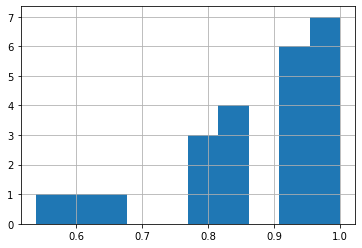

In [98]:
pd.DataFrame({'Guess':labs,
              'Win':(np.array(labs)==np.array(testlabs))*1}).assign(dummy=1).groupby('Guess').agg('sum').reset_index().\
    assign(WinRate=lambda x : x.Win/x.dummy)['WinRate'].hist()
print(pd.DataFrame({'Guess':labs,
              'Win':(np.array(labs)==np.array(testlabs))*1}).assign(dummy=1).groupby('Guess').agg('sum').reset_index().\
    assign(WinRate=lambda x : x.Win/x.dummy)['WinRate'].median())